# Notebook 13: The Central Limit Theorem
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pylab as plt 
%matplotlib inline

### Exercise 1 - Estimating Mean Income from a Population
*** 

The file income_data.csv contains Age and Income information from a fictitious city in the Midwest with 5000 residents.  

**Part A**: Shift-Enter the following cells to load the data into a pandas DataFrame called dfIncome and make a histogram of the data with 20 bins. 

In [2]:
local_path = "../data/income_data.csv"
#web_path   = "https://raw.githubusercontent.com/dblarremore/csci3022/master/notebooks/data/income_data.csv"
file_path  = local_path 

dfIncome = pd.read_csv(file_path)
dfIncome.head()

,Age,Income
0,28,28667
1,39,48929
2,34,88143
3,45,128510
4,45,25290


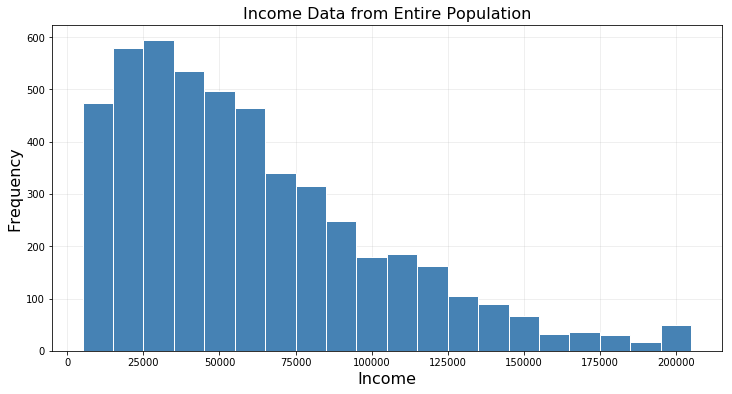

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
dfIncome.hist(column="Income", bins=20, color="steelblue", edgecolor="white", ax=ax)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_title("Income Data from Entire Population", fontsize=16)
ax.set_xlabel("Income", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16);

**Part B**: How would you characterize the distribution of Income in the population? 

**Solution**: Doesn't really look like any distribution we've seen before (in fact, it's loosely modeled with the [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution) distribution).  At the least we can say the distribution seems to have a mean in the  $\$50K-\$70K$ range, a mode around $\$30K$, and has a strong positive skew. 

**Part C**: Determine the mean-income for the entire population. 

In [4]:
print("Population Mean = ${:.2f}".format(dfIncome["Income"].mean()))

Population Mean = $60613.85


**Part D**: In real life, we have populations much bigger than $5000$.  If we want to estimate the mean of the population we have to draw a sample from the population and compute the sample mean.  The important questions we have to ask are things like: 

- Is the sample mean a good approximation of the population mean? 
- How large does my sample need to be in order for the sample mean to well-approximate the population mean? 

Complete the following function to sample $n$ rows from dfIncome and return the estimated mean. Start with a sample size of 10 and draw at least 5 estimated means from your function.  Are the estimated means good approximations to the population mean we computed above? What if you increase the sample size?  Discuss the results with your neighbors. 

In [5]:
def income_sample_mean(df, n):
    dfSample = df.sample(n)
    return dfSample["Income"].mean()

**Solution**: 

In [6]:
print(np.array([income_sample_mean(dfIncome, 10) for _ in range(5)]))

[63017.  53564.8 68387.8 50845.2 74066.5]


For $n=10$ the estimates are kinda all over the place.  We have estimated means as low as the $\$40K$s and as high as the $\$70K$'s. Let's try increasing the sample size to $n=100$. 

In [7]:
print(np.array([income_sample_mean(dfIncome, 100) for _ in range(5)]))

[62108.52 62898.91 59733.17 50856.23 61166.28]


That looks better.  All of the estimates are pretty close to the known population mean of $\$60.6K$. Let's try it with $n=1000$.  

In [8]:
print(np.array([income_sample_mean(dfIncome, 1000) for _ in range(5)]))

[62238.576 59460.091 61483.949 60428.611 60353.24 ]


**Part E**: Notice, that for a sample-size of $n$, our function is returning an estimator of the form 

$$
\bar{X} = \frac{1}{n}\sum_{k=1}^n X_k 
$$

If we think of each $X_k$ as being an independent and identically distributed (i.i.d.) random variable that follows the population distribution, what can you say about the estimated mean $\bar{X}$? 

**Solution**: If the $X_k$'s are random variables, then the estimator $\bar{X}$ is a random variable itself! 

**Part F**: If $\bar{X}$ is a random variable then it too must have a distribution. We call the distribution of $\bar{X}$ the **sample distribution**.  But what the heck does this distribution look like? 

Let's explore. 

One way that we could do this is to sample from the sample distribution by computing many **independent estimates** of the population mean and draw a histogram.  Complete the function income_sample_dist to draw at least 1000 estimates of the mean with a given sample size $n$ and then draw a histogram of the results. Start with a sample size of $n=5$ and then increase it to $n=50$, $n=500$, etc. Discuss your results with your neighbors. 

In [9]:
def income_sample_dist(df, n=5, num_means=1000):
    means = pd.Series([income_sample_mean(df, n) for ii in range(num_means)])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    means.hist(ax=ax, color="steelblue", bins=12, edgecolor="white")
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_xlim([20000,100000])

**Solution**: 

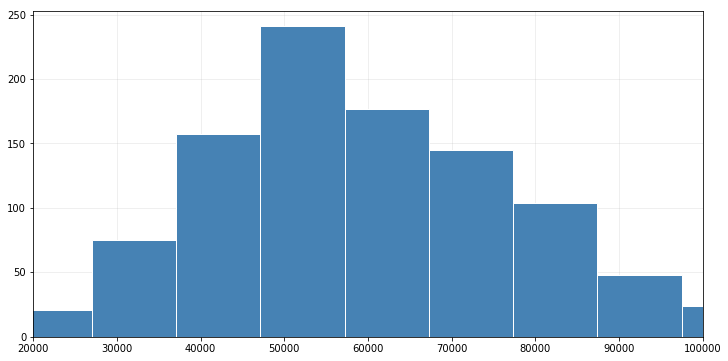

In [10]:
income_sample_dist(dfIncome, n=5, num_means=1000)

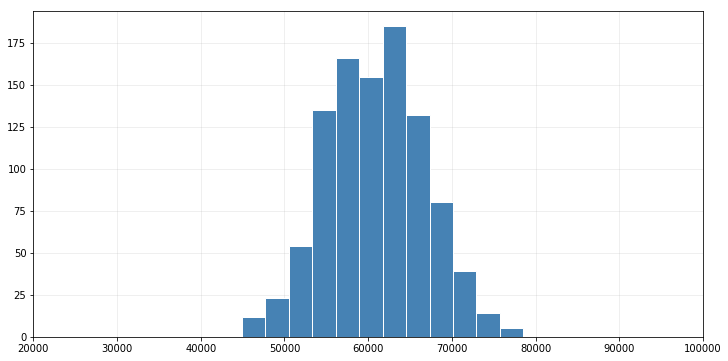

In [11]:
income_sample_dist(dfIncome, n=50, num_means=1000)

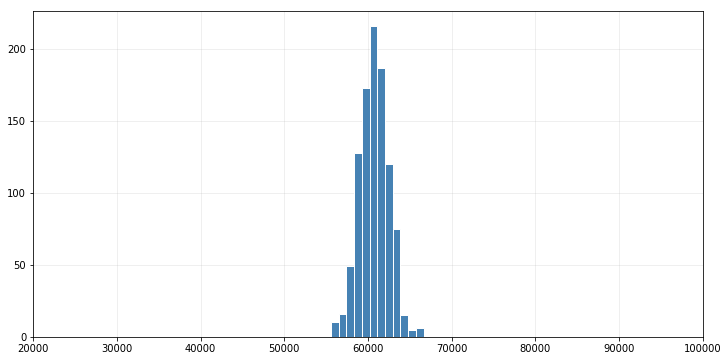

In [12]:
income_sample_dist(dfIncome, n=500, num_means=1000)

The important things to notice here are: 

1. The random variable $\bar{X}$ appears to be approximately **NORMALLY DISTRIBUTED** despite the fact that our population is **not**! 
2. The mean $\mu$ of the sample distribution appears to be very similar to the known mean of the population, specifically it appears to be around $\$60.6K$. 
3. The variance/standard deviation of the normal sample distribution gets smaller as we increase the sample size! 

 It turns out that for a big enough sample size $n$, the distribution of the sample mean approaches $N(\mu,\sigma^2/n)$ where $\mu$ and $\sigma^2$ are the mean and standard deviation of the population distribution, respectively.  This fact is the main result of the so-called **Central Limit Theorem**. 

### Exercise 2 - Estimating Means of the Binomial Distributions
*** 

The size of the sample that you have to draw before the estimator becomes approximately normally distributed depends on how non-normal the population distribution is.  In this exercise we'll look at the sample means of the Binomial distribution when $p=0.5$ (pretty normal) and $p=0.95$ (pretty non-normal). 

**Part A**: Draw at least $10000$ samples from the distribution $Bin(6,0.5)$ and $Bin(6,0.95)$ and make histograms with compatible axes-limits. 

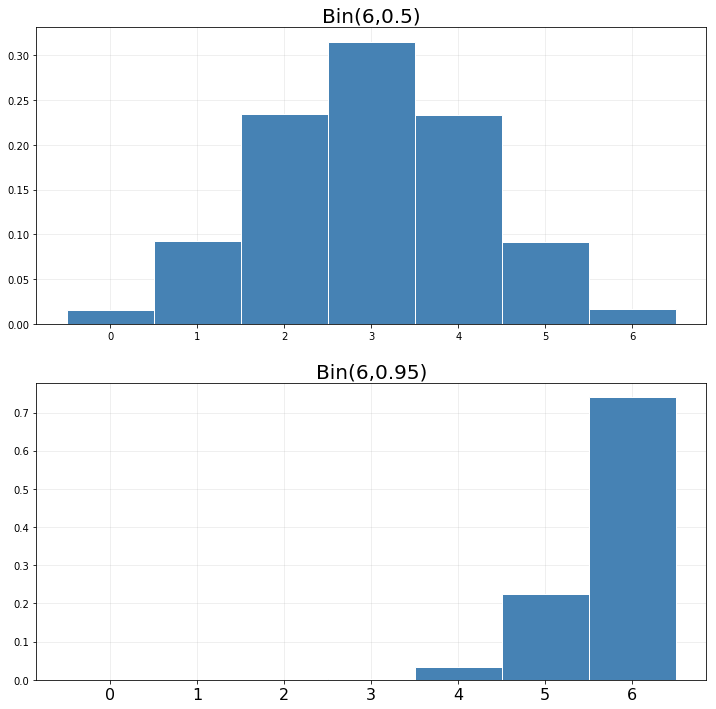

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,12))

x5 = np.random.binomial(6, 0.5, size=10000)
pd.Series(x5).hist(ax=axes[0], color="steelblue", edgecolor="white", bins=np.linspace(-.5,6.5,8), density=True)
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)
axes[0].set_title("Bin({},{})".format(6,0.5), fontsize=20);
plt.xticks(range(6+1), fontsize=16);

x9 = np.random.binomial(6, 0.95, size=10000)
pd.Series(x9).hist(ax=axes[1], color="steelblue", edgecolor="white", bins=np.linspace(-.5,6.5,8), density=True)
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)
axes[1].set_title("Bin({},{})".format(6,0.95), fontsize=20);
plt.xticks(range(6+1),fontsize=16);

**Part B**: We know from class that the expected value of $Bin(n,p)$ is $E[X] = np$.  Complete the function est_mean_bin below to draw estimates of the mean of $Bin(n,p)$ of a given sample size. Test your function by drawing several means with a sample size of your choice.  Do you get results that are fairly close to $E[X]$ for your given choice of parameter? 

In [14]:
def est_mean_bin(n=6, p=0.5, sample_size=5):
    return np.mean(np.random.binomial(n,p,size=sample_size))

In [15]:
print([est_mean_bin(n=6, p=0.5, sample_size=10) for ii in range(5)])

[3.0, 2.8, 2.0, 3.1, 2.9]


**Part C**: Complete the function sample_bin_dist that computes many independent estimates of the mean of $Bin(n,p)$ and plots their histogram.  Vary the size of the samples in each estimate.  How big does the sample size have to be for $Bin(6,0.5)$ before the sample distribution looks approximately normal? How big does the sample size have to be for $Bin(6,0.95)$ before the sample distribution looks approximately normal? 

In [16]:
def sample_bin_dist(n=6, p=0.5, sample_size=5, num_means=int(5e4)):
    means = np.array([est_mean_bin(n, p, sample_size) for ii in range(num_means)])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    pd.Series(means).hist(ax=ax, color="steelblue", edgecolor="white", density=False, bins=9)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_title("Estimates of Bin({},{}) Mean with n={}".format(n,p,sample_size), fontsize=20);

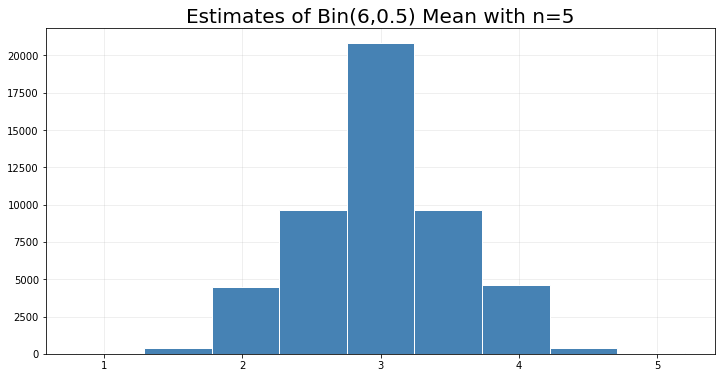

In [17]:
sample_bin_dist(n=6, p=0.5, sample_size=5)

Not quite approximately normal. 

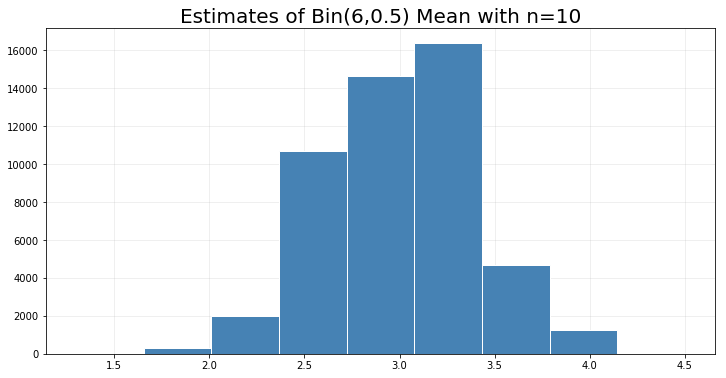

In [18]:
sample_bin_dist(n=6, p=0.5, sample_size=10)

Symmetric-ish, but still not normal. 

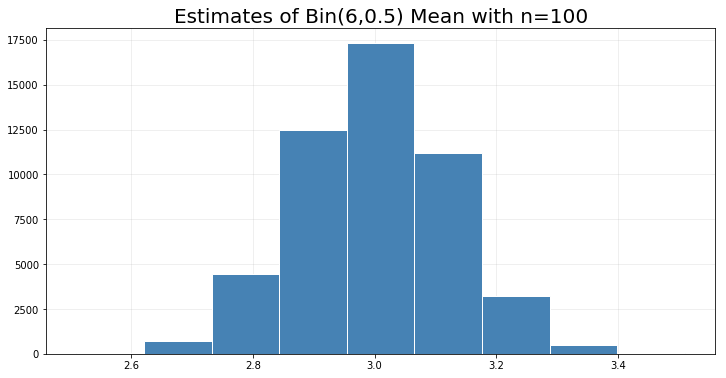

In [19]:
sample_bin_dist(n=6, p=0.5, sample_size=100)

Ehhh, pretty close. 

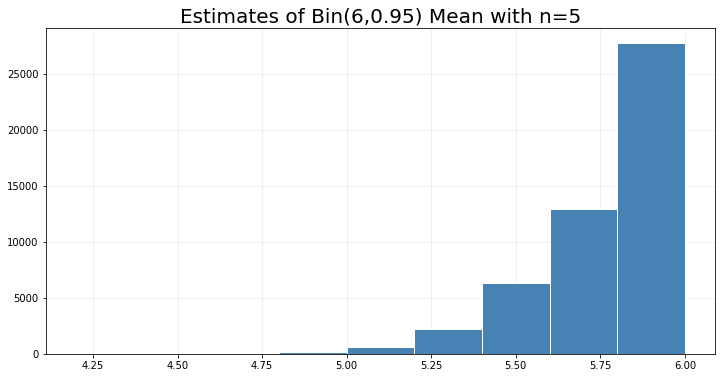

In [20]:
sample_bin_dist(n=6, p=0.95, sample_size=5)

Definitely not normal. 

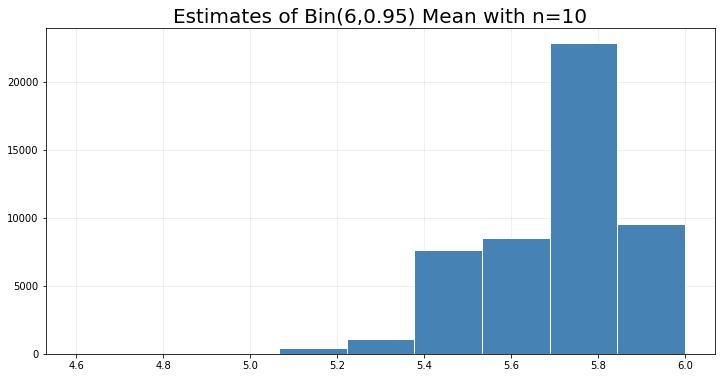

In [21]:
sample_bin_dist(n=6, p=0.95, sample_size=10)

Definitely not normal. 

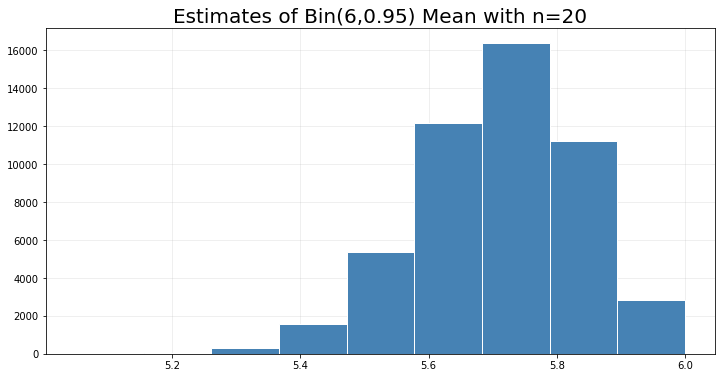

In [22]:
sample_bin_dist(n=6, p=0.95, sample_size=20)

Close, but no cigar. 

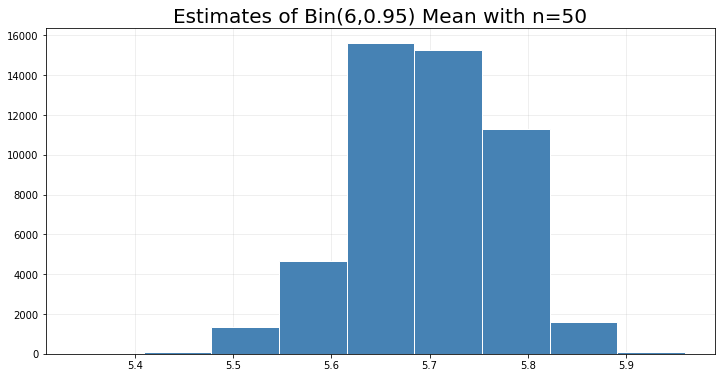

In [23]:
sample_bin_dist(n=6, p=0.95, sample_size=50)

Still kinda non-symmetric. 

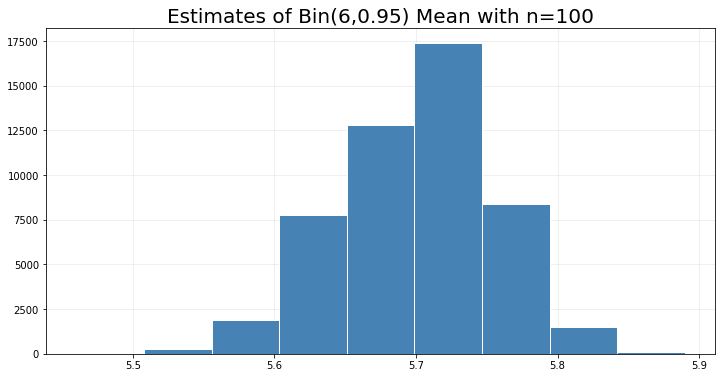

In [24]:
sample_bin_dist(n=6, p=0.95, sample_size=100)

Pretty darn close.  

The take-away here is that it takes longer for the histogram of the sample mean to approximate a normal distribution if the original distribution is very non-normal.

### Exercise 3 - The CLT and Monte Carlo Simulation 
*** 

In this exercise we'll see how we can use the CLT to estimate how good our approximation from a simulation actually is. 

**Part A**: Let $X$ be a random variable taking on the face values of a $d$-sided die after a single roll.  If the die is fair, then $X$ follows a discrete uniform distribution of the form $\textrm{unif}\{1,d\}$. Look up the mean and variance of $\textrm{unif}\{1,d\}$ on [wiki](https://en.wikipedia.org/wiki/Discrete_uniform_distribution) and figure out the specific values of the mean and variance when $d=6$.  


**Solution**: We have 

$$
E[X] = \frac{1+d}{2} = \frac{1+6}{2} = 3.5 \quad \textrm{and} \quad \textrm{Var}(X) = \frac{(d-1+1)^2-1}{12} = \frac{35}{12} \approx 2.92
$$

**Part B**: Write a function sim_die that takes as arguments integers $d$ representing the number of sides on the die and $n$ representing the number of iterations to run your simulation.  The function should return an estimate of the expected value of the die roll, as well as an array of the results of each of the $n$ rolls in the simulation. 

In [25]:
def sim_die(d=6, n=int(1e3)):
    rolls = np.array(np.random.choice(range(1,d+1), size=n))
    return np.mean(rolls), rolls

**Part C**: Write a function running_est that takes in your rolls history from **Part B** and computes the running estimate of the expected value after each new sample in the simulation.  That is, your function should return an array $r$ such that 

$$
r[i] = \frac{\textrm{Estimate after i samples}}{i} \quad \textrm{for }i=1,2,\ldots,n
$$

**Solution**:

In [26]:
def running_est(rolls):
    r = np.array([np.mean(rolls[:ii]) for ii in range(1,len(rolls)+1)])
    return r 

**Part D**: Let $\bar{X}_n$ the the random variable that estimates $E[X]$ using the first $n$ rolls of the simulation.  Based on the Central Limit Theorem, what distribution does the $\bar{X}_n$ follow when $d=6$. 


**Solution**: For sufficiently large $n$, $\bar{X}_n$ has distribution $N(\mu, \sigma^2/n)$ where $\mu$ and $\sigma$ are the mean and variance of $X$, respectively.  In the case that $d=6$, we have 

$$
\bar{X}_n \sim N\left(3.5, \frac{2.92}{n}\right)
$$

**Part E**: Give an upper and lower bound for a region that $\bar{X}_n$ will fall in with 95% probability when $d=6$ as a function of $n$. 

**Solution**: Let's formulate the problem as finding a value of $\mu$ plus/minus a multiple of the standard deviation that will give us a 95% bound.  Note that $\sqrt{2.92}= 1.71$.  We then have 


$$
P\left(3.5 - y\cdot\frac{1.71}{\sqrt{n}} \leq \bar{X}_n \leq 3.5 + y\cdot\frac{1.71}{\sqrt{n}} \right) = 0.95
$$

Converting to a standard unit normal, we have 

$$
3.5 \pm y\cdot\frac{1.71}{\sqrt{n}} \rightarrow \left[3.5 \pm y\cdot\frac{1.71}{\sqrt{n}} - 3.5\right] \bigg/\frac{1.71}{\sqrt{n}} = \pm y 
$$

Thus, if $Z$ is a standard normal random variable we want to choose $y$, so that 

$$
P(-y \leq Z \leq y) = 0.95
$$

Note that this occurs when $y$ is the $97.5$th percentile of $N(0,1)$.  We can check this value using Python 

In [27]:
print("y = {:.3f}".format(stats.norm.ppf(.975)))

y = 1.960


Thus, with 95% probability, we expect our running estimate of the mean to fall in the interval 

$$
3.5 - 1.96\cdot\frac{1.71}{\sqrt{n}} \leq \bar{X}_n \leq 3.5 + 1.96\cdot\frac{1.71}{\sqrt{n}}
$$

Note that as $n$ increases (i.e. we run more iterations of the simulation) the interval around the true mean shrinks.  The coefficients in the $\pm$ terms then give us an idea how large $n$ should be if we want our estimate to be particularly close to the true mean of $\mu = 3.5$. 

**Part F**: The following function takes the number of sides of the dice and your array of running estimates of the mean and plots the trajectory of the running estimate.  If you set the bounds flag to True it plots a shaded region enclosing the mean.  Currently the shaded region is a constant interval.  Your job in this part of the exercise is to modify the array err95 so that the shaded region depicts the 95% confidence interval around the mean of the estimator. 

**Note**: For bonus (non-existent) points, make your implementation general with respect to the number of sides on the dice.

In [28]:
def running_plot(d, r, bounds=False):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
    ax.plot(range(1,len(r)+1),r, color="steelblue")
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_ylim([np.mean(range(1,d+1))-1.5, np.mean(range(1,d+1))+1.5])
    ax.set_xlim([1,len(r)])
    ax.set_xlabel("iteration", fontsize=16)
    ax.set_ylabel("estimate", fontsize=16)
    
    mu = np.mean(range(1,d+1))
    var = ((d-1+1)**2-1)/12
    sd = np.sqrt(var)
    
    if bounds: 
        err95 = np.array([stats.norm.ppf(.975)*sd/np.sqrt(ii) for ii in range(1,len(r)+1)])
        ax.fill_between(range(1,len(r)+1), mu+err95, mu-err95, color="steelblue", alpha=0.2)

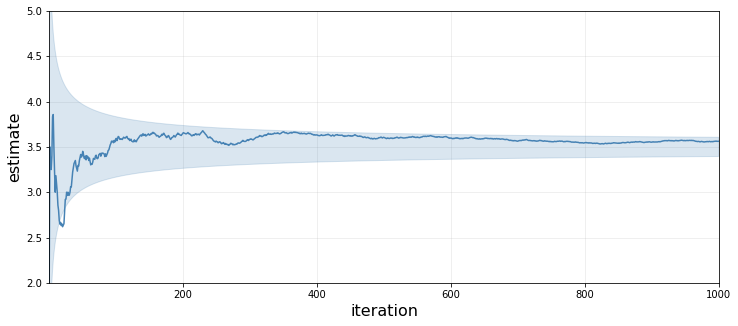

In [29]:
d=6
x, rolls = sim_die(d=d, n=int(1e3))    
r = running_est(rolls)
running_plot(d,r,bounds=True)

**Part G**: If you run your simulation enough times, you'll eventually get a case where the running estimate wanders outside of the shaded region.  How can you explain this? 

**Solution**: The shaded region only shows the interval that the estimator will fall into with 95% probability. It is certainly possible that the trajectory will wander out of this interval on rare occasions. Occasionally, you'll see the trajectory wander out of the interval very early on.  This is likely because the confidence interval is based on the normality assumption of the Central Limit Theorem.  For small $n$, the sample distribution might not yet be approximately normal.  

**Part F**: If you didn't make your bounds estimate general in **Part F**, go back and do so now.  Then run the experiment for dice with increasing number of sides.  What differences do you notice in the trajectory and confidence interval?  How can you explain the differences? 

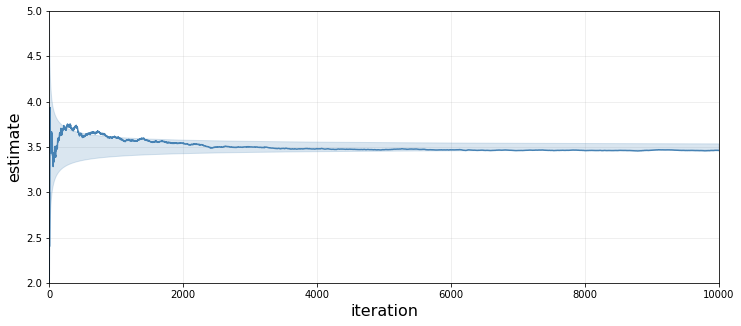

In [30]:
d=6
x, rolls = sim_die(d=d, n=int(1e4))    
r = running_est(rolls)
running_plot(d,r,bounds=True)

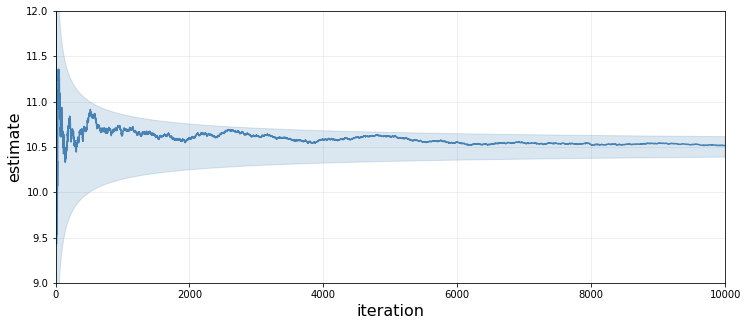

In [31]:
d=20
x, rolls = sim_die(d=d, n=int(1e4))    
r = running_est(rolls)
running_plot(d,r,bounds=True)

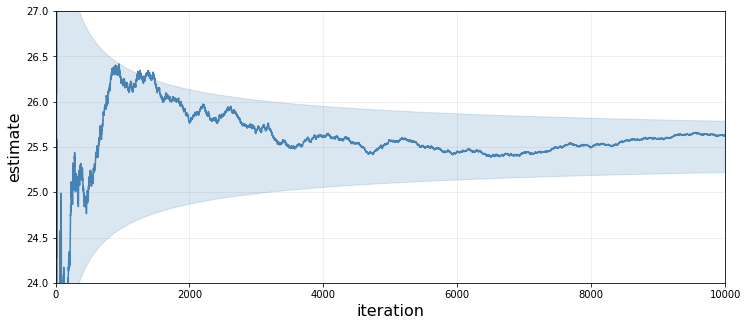

In [32]:
d=50
x, rolls = sim_die(d=d, n=int(1e4))    
r = running_est(rolls)
running_plot(d,r,bounds=True)

**Solution**: The confidence interval gets wider as the number of sides on the die increases.  This is because the variance of random variable $X$ increases with $d$.  Since the width of the confidence interval depends on $\textrm{Var}(X)$, the interval gets wider. 